<a href="https://colab.research.google.com/github/ahmedfathi1/Project-2/blob/main/Classification_of_stroke_incidence_based_on_certain_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification of stroke incidence based on certain features
####By: Ahmed Fathi
####Date: 12/23/2022

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTw3ViyzRmoFqMklP0cJYLB45pzX0l_wBY_vB_KxE9c50o3QM9wI3qxMJPTD-qfmVeNKsXCw6HAYuj0/pub?output=csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#creating a copy of the data frame to use for Visualization purposes
df2 = df.copy()

In [4]:
#creating a copy of the data frame for modeling purposes
eda_df = df.copy()

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# deleting the id column because it is unnecessary
df2 = df2.drop('id', axis = 1)

In [7]:
# Check for duplicates and missing values
print('Missing data:\n', df2.isna().sum())
print('\n')
print('Duplicates:', df2.duplicated().sum())

Missing data:
 gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Duplicates: 0


In [8]:
# filling the missing values in the bmi column with the mean
mean_bmi = df2['bmi'].median()
df2['bmi'].fillna(mean_bmi, inplace=True)

In [9]:
# checking for odd values in the remaining 'object' type columns
dtypes = df2.dtypes
remaining_cols = dtypes[dtypes == 'object'].index
remaining_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [10]:
# using the for loop to loop through the object columns and print their values to see any inconsistent data
for col in remaining_cols:
  print(f'-- Column = {col}')
  print(df2[col].value_counts(dropna = False))
  print('\n')

-- Column = gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


-- Column = ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


-- Column = work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


-- Column = Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


-- Column = smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




In [11]:
# looking at the descriptive statistics of the data for any outliers or confusing data
df2.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#Exploratory visualizations

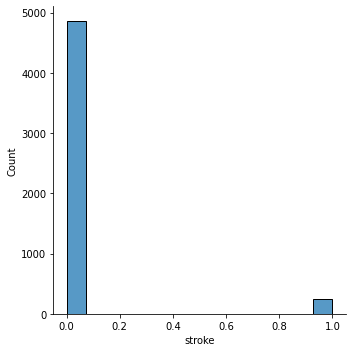

In [12]:
# checking out the counts for those that have had a stroke and those that have not. This is our target
sns.displot(df2, x="stroke")

###Based on this visualization, our data will need to be balanced as we move along with modeling.

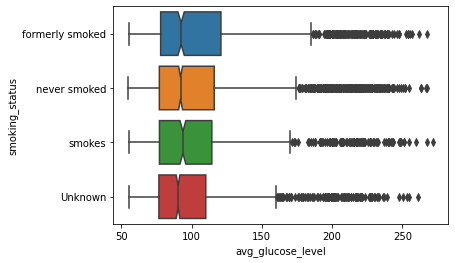

In [13]:
# looking at the stattistics of smoking status and what peoples average glucose levels are
sns.boxplot(data=df, y='smoking_status', x='avg_glucose_level', notch=True);

###We can see that those that formerly smoked had higher average glucose levels.

#Explanatory visualizations

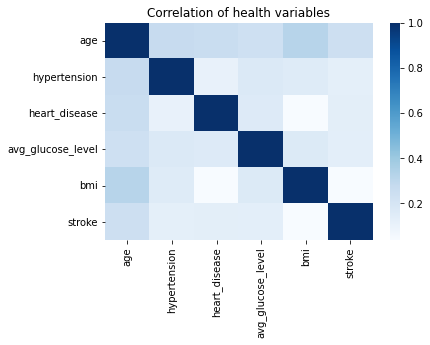

In [14]:
corr = df2.corr()
sns.heatmap(corr, cmap = 'Blues').set(title='Correlation of health variables');

####Some correlations of note here are the age to bmi and the bmi to avg_glucose_level. Both of these correlations make sense becuase age and Glucose levels play a huge part in someones BMI.

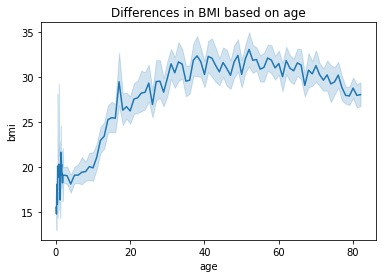

In [15]:
rel = sns.lineplot(data=df2, x="age", y="bmi").set(title='Differences in BMI based on age')

####Based on the above graph, we can see the relationship between aging and higher BMI values. In this specific population, it looks like at around 15-20 is when BMI starts to increase and at around 60 years of age is when BMI begins to drop a little.

#Preprocessing Steps

In [16]:
#importing preprocessing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [17]:
#splitting the data into features and target
X = eda_df.drop(columns='stroke')
y = eda_df['stroke']

#Stratify to make sure we have the same class balance in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
#Check class balance
eda_df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

####After looking at the class balance, we will have to balance the classes.

In [19]:
#setting the Imputer
mean_imputer = SimpleImputer(strategy='mean')
frequency_imputer = SimpleImputer(strategy = 'most_frequent')

#instantiating OHE and Scaler
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

#column_selectors to tell the column transformers which columns to apply which preprocessing to
category_selector = make_column_selector(dtype_include='object')
number_selector = make_column_selector(dtype_include='number')

#setup the pipelines for the numeric and categorical (nominal only) data
num_pipeline = make_pipeline(mean_imputer, scaler)
nom_pipeline = make_pipeline(frequency_imputer, ohe)

#make tuples for preprocessing the categorical and numeric columns
numeric_tuple = (num_pipeline, number_selector)
nominal_tuple = (nom_pipeline, category_selector)

#created the preprocessor that transforms the numeric and categorical columns
preprocessor = make_column_transformer(numeric_tuple, 
                                          nominal_tuple, 
                                          remainder='drop')

##Using a dummy classifier model as a baseline

Classification Report for Testing Set
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1198
           1       0.11      0.06      0.08        80

    accuracy                           0.91      1278
   macro avg       0.52      0.51      0.52      1278
weighted avg       0.89      0.91      0.90      1278



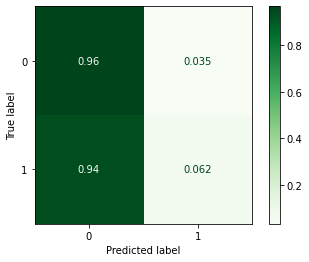

In [20]:
from sklearn.dummy import DummyClassifier
# Instantatiate model
dummy = DummyClassifier(strategy='stratified')

#create and fit pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)
dummy_pipe.fit(X_train, y_train)

#save predictions
train_preds = dummy_pipe.predict(X_train)
test_preds = dummy_pipe.predict(X_test)


# print the test classification report
print('Classification Report for Testing Set')
test_report = classification_report(y_test, test_preds)
print(test_report)

# create and display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize='true', 
                                        cmap='Greens');

##Using a logistic regression model to look at our training and test scores

In [33]:
#make an instance of the model with default parameters
logreg = LogisticRegression()

#put scaler and model in a pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)

#fitting the log reg pipe on the training data
logreg_pipe.fit(X_train, y_train)

#save logreg predictions
log_train_preds = logreg_pipe.predict(X_train)
log_test_preds = logreg_pipe.predict(X_test)


#printing the score of the logreg pipe
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

#print the test classification report again, but adding target_names
print('Classification Report for Testing Set')
test_report = classification_report(y_test, log_test_preds)
print(test_report)
print(roc_auc_score(y_test, log_test_preds))

0.9558977035490606
0.9381846635367762
Classification Report for Testing Set
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       1.00      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.94      0.94      0.91      1278

0.50625


###The results shown are good, lets see how a KNN model performs.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [23]:
#Create KNN Object
knn = KNeighborsClassifier()

#combining KNN and the preproccessor for the pipeline
knn_pipe = make_pipeline(preprocessor, knn)

#Training the model
knn_pipe.fit(X_train, y_train)

#Predict test data set
y_pred = knn_pipe.predict(X_test)

#Checking performance of our model with classification report
print(classification_report(y_test, y_pred))

#Checking the performance of our model with ROC Score
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



0.49958263772954925

####We can see that our model's accuracy is 94% with a AUC score of about 50%. Let see if tuning the hyperparameters will give us a better result.

In [24]:
#to check on our params and see what we can focus on
knn_pipe.get_params()


{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f8d8d4c00d0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f8d8d4c

In [25]:
#selecting the params we want to focus on and the ranges we want to give them
param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['balanced','uniform']}

In [26]:
#instantiating the gridsearch with the knn pipe we already created
knn_pipe_gs = GridSearchCV(knn_pipe, param_grid)
 
#fitting the newly created pipe onto the training data
knn_pipe_gs.fit(X_train, y_train)

#printing out the best results
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 196, in fit
    self.weights = _check_weights(self.weights)
  File "/usr/loca

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__p': 4, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.9374021909233177


###Using the best hyperparameters, we can now see how the KNN will score after tuning

In [27]:
#Training the model
best_pipe.fit(X_train, y_train)

#Predict test data set
y_pred_best = best_pipe.predict(X_test)

#Checking performance of our model with classification report
print(classification_report(y_test, y_pred_best))

#Checking the performance of our model with ROC Score
roc_auc_score(y_test, y_pred_best)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5

###After tuning there wasn't much change in our precision, recall, f1, and accuracy scores, however there was a slight increase in our AUC score.

###Lets see if we can speed up the process and get better results of the KNN model using a PCA that will retain 95% of the variance

In [28]:
#importing the PCA library
from sklearn.decomposition import PCA

In [32]:
# Create a PCA object that will retain 95% of the variance when transforming
pca = PCA(n_components=0.95)

# Combine the scaler and the PCA in a pipeline.
pca_pipeline = make_pipeline(preprocessor, pca)

# Transform the training data
pca_pipeline.fit_transform(X_train)

# Create and fit a KNN model WITH PCA.
knn_pipe_pca = make_pipeline(pca_pipeline, KNeighborsClassifier())
knn_pipe_pca.fit(X_train, y_train)

#Predict test data set
y_pred_best_pca = knn_pipe_pca.predict(X_test)

#Checking performance of our model with classification report
print(classification_report(y_test, y_pred_best_pca))

#Checking the performance of our model with ROC Score
roc_auc_score(y_test, y_pred_best_pca)


# # Make predictions and evaluate the model using classification_report
# train_preds = knn_pipe.predict(X_train)
# test_preds = knn_pipe.predict(X_test)
# print('Classification Report for Training Set')
# train_report = classification_report(y_train, train_preds)
# test_report = classification_report(y_test, test_preds)
# print(train_report)
# print(test_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



0.49958263772954925

###With the PCA, the KNN model was able to give a sort of similar output in nearly no time at all.

#For my production model, I would go with using a logistic regression model as it gave us the best results in terms of how scores go. 